In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
game = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
game.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Dataset loaded and first 5 columns and rows are printed 

In [38]:
game.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

The above details shows that we don't have any null values in our dataset

In [40]:
col = game.columns
col

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

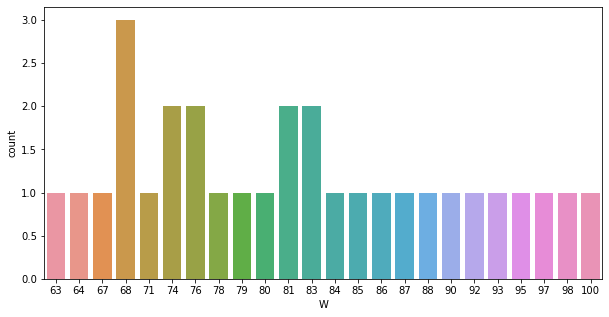

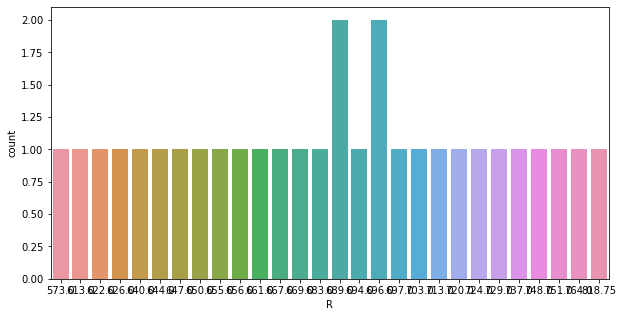

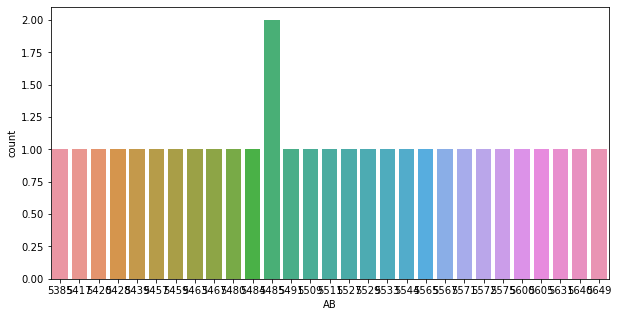

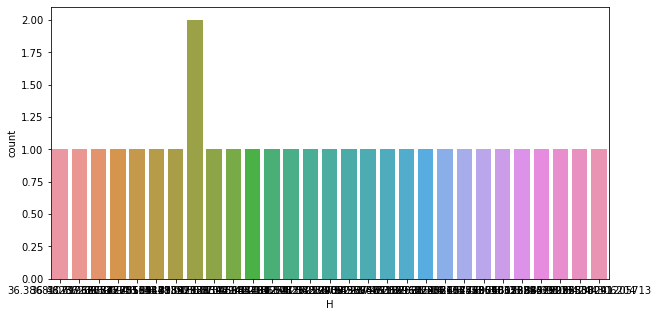

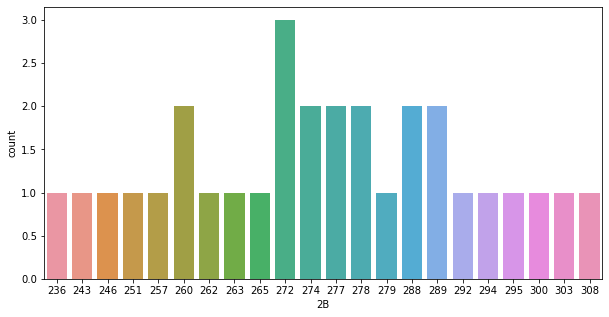

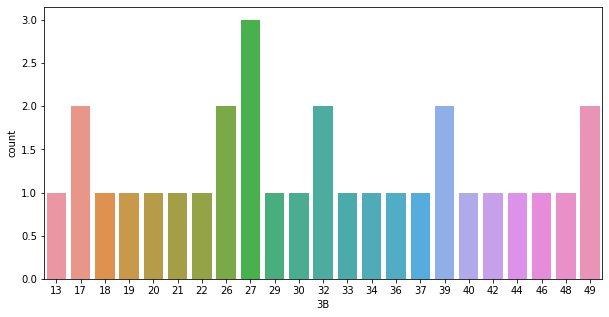

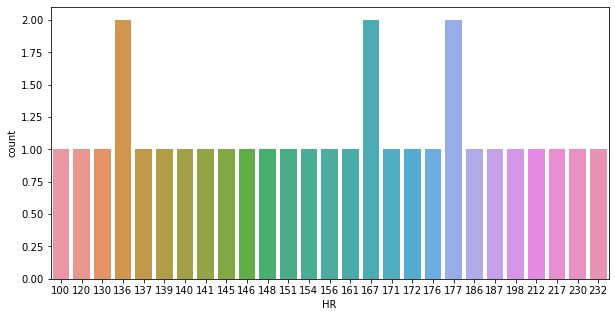

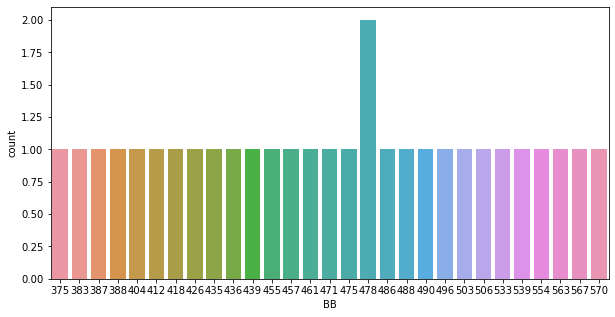

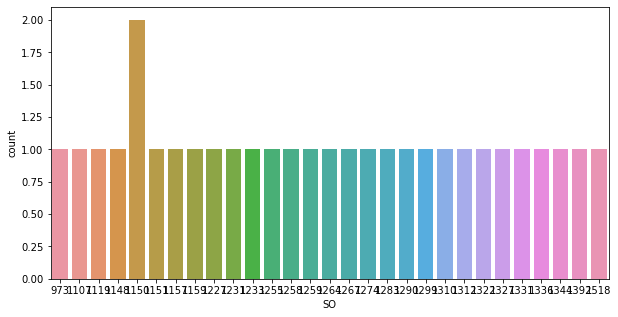

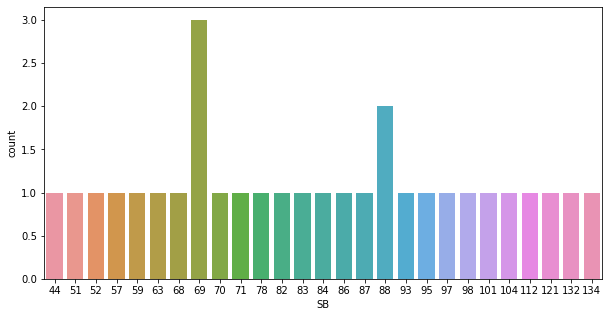

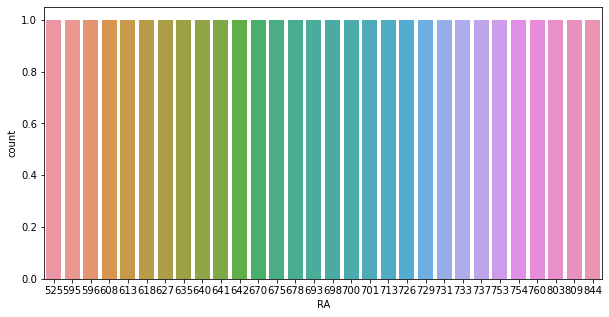

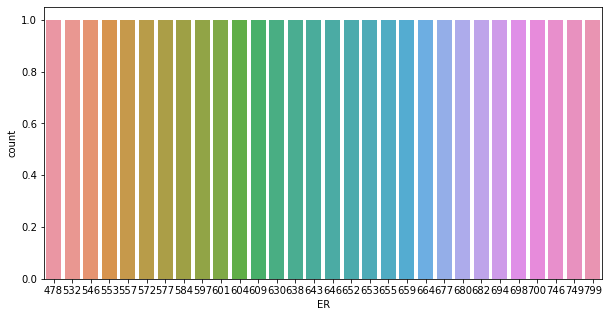

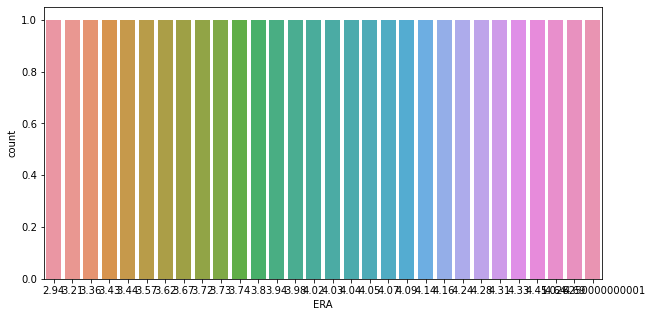

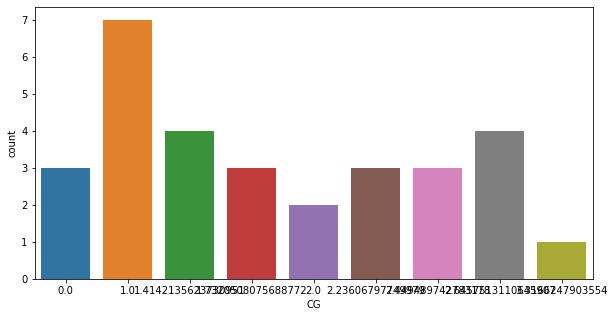

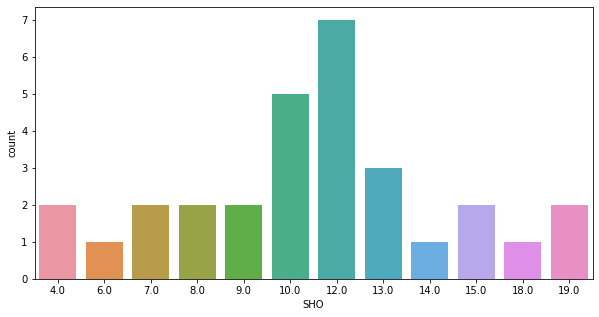

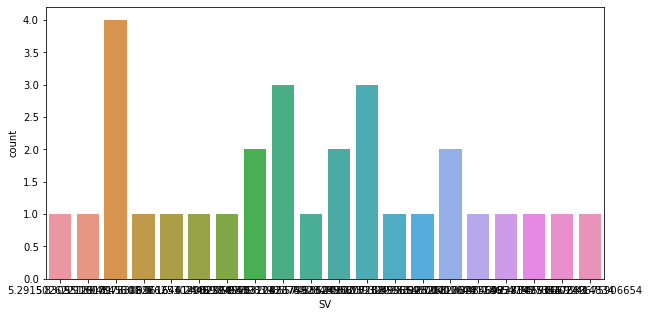

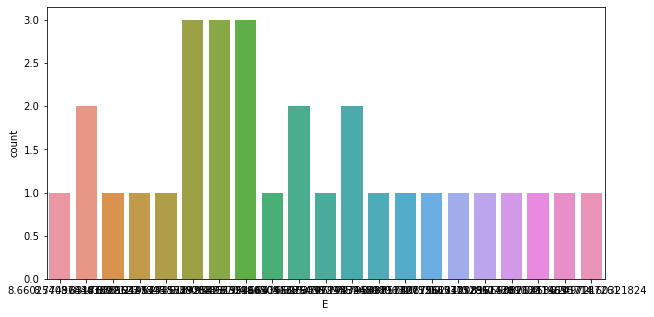

In [45]:
for i in col:
    plt.figure(figsize=(10,5))
    sns.countplot(game[i])
    plt.show

W          AxesSubplot(0.125,0.71587;0.0945122x0.16413)
R       AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
AB      AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
H       AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
2B      AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
3B      AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
HR      AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
BB        AxesSubplot(0.125,0.518913;0.0945122x0.16413)
SO     AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
SB     AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
RA     AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
ER     AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
ERA    AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
CG     AxesSubplot(0.805488,0.518913;0.0945122x0.16413)
SHO       AxesSubplot(0.125,0.321957;0.0945122x0.16413)
SV     AxesSubplot(0.238415,0.321957;0.0945122x0.16413)
E      AxesSubplot(0.351829,0.321957;0.0945122x0.16413)
dtype: object

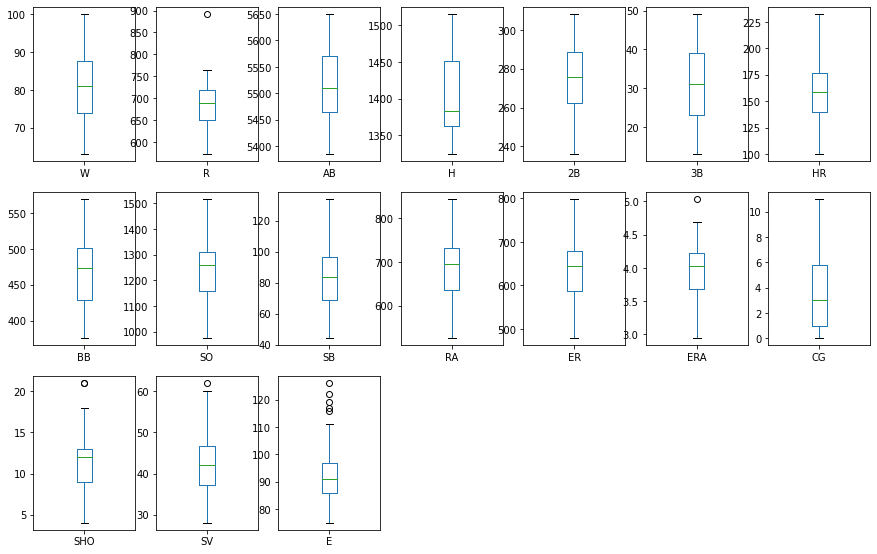

In [4]:
game.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 651.25
75 quartile of is: 718.25
The IQR value is: 67.0
The high value is 818.75
The low value is 550.75


R    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

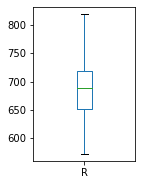

In [5]:
q1 = game['R'].quantile(.25)
q3 = game['R'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

(game[game['R'] > high_range]) 
(game[game['R'] < low_range])

game['R'] = np.where(
    game['R'] > high_range,
    high_range,
    np.where(
        game['R'] < low_range,
        low_range,
        game['R']
    )
)

game['R'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 9.0
75 quartile of is: 13.0
The IQR value is: 4.0
The high value is 19.0
The low value is 3.0


SHO    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

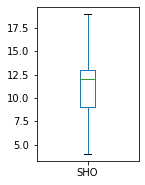

In [6]:
q1 = game['SHO'].quantile(.25)
q3 = game['SHO'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

(game[game['SHO'] > high_range]) 
(game[game['SHO'] < low_range])

game['SHO'] = np.where(
    game['SHO'] > high_range,
    high_range,
    np.where(
        game['SHO'] < low_range,
        low_range,
        game['SHO']
    )
)

game['SHO'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 3.6825
75 quartile of is: 4.220000000000001
The IQR value is: 0.5375000000000005
The high value is 5.026250000000001
The low value is 2.8762499999999993


ERA    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

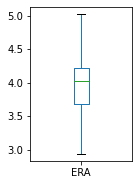

In [7]:
q1 = game['ERA'].quantile(.25)
q3 = game['ERA'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

(game[game['ERA'] > high_range]) 
(game[game['ERA'] < low_range])

game['ERA'] = np.where(
    game['ERA'] > high_range,
    high_range,
    np.where(
        game['ERA'] < low_range,
        low_range,
        game['ERA']
    )
)

game['ERA'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 37.25
75 quartile of is: 46.75
The IQR value is: 9.5
The high value is 61.0
The low value is 23.0


SV    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

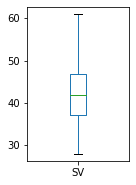

In [8]:
q1 = game['SV'].quantile(.25)
q3 = game['SV'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

(game[game['SV'] > high_range]) 
(game[game['SV'] < low_range])

game['SV'] = np.where(
    game['SV'] > high_range,
    high_range,
    np.where(
        game['SV'] < low_range,
        low_range,
        game['SV']
    )
)

game['SV'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

W          AxesSubplot(0.125,0.71587;0.0945122x0.16413)
R       AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
AB      AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
H       AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
2B      AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
3B      AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
HR      AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
BB        AxesSubplot(0.125,0.518913;0.0945122x0.16413)
SO     AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
SB     AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
RA     AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
ER     AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
ERA    AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
CG     AxesSubplot(0.805488,0.518913;0.0945122x0.16413)
SHO       AxesSubplot(0.125,0.321957;0.0945122x0.16413)
SV     AxesSubplot(0.238415,0.321957;0.0945122x0.16413)
E      AxesSubplot(0.351829,0.321957;0.0945122x0.16413)
dtype: object

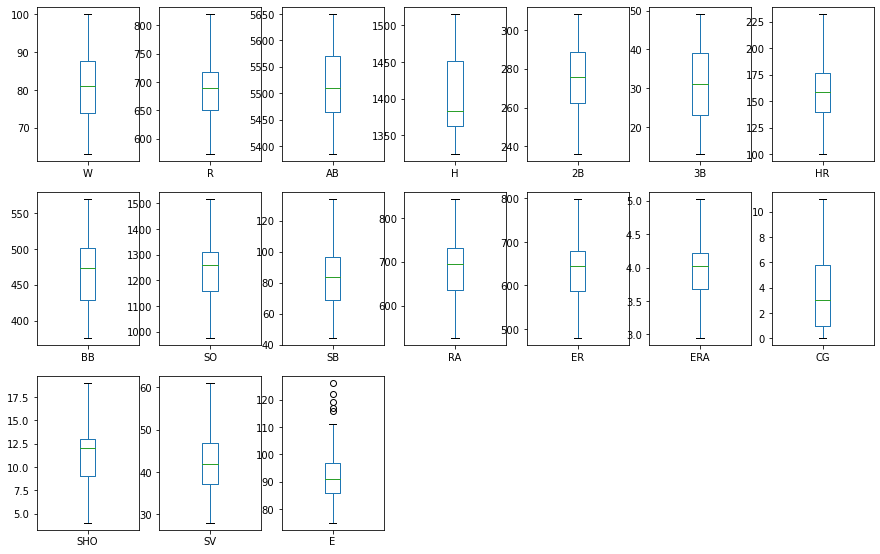

In [9]:
game.plot(kind='box',subplots=True, layout=(4,7), figsize = (15,13))

Data Difference

In [10]:
(30-29)/30*100

3.3333333333333335

In [11]:
game.skew()

W      0.047089
R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.890132
dtype: float64

In [12]:
col1 = game.columns

In [13]:
for i in col1:
    if (game[i].skew() > 0.55 or game[i].skew() < -0.55):
        print(i)

H
CG
SV
E


<function matplotlib.pyplot.show(close=None, block=None)>

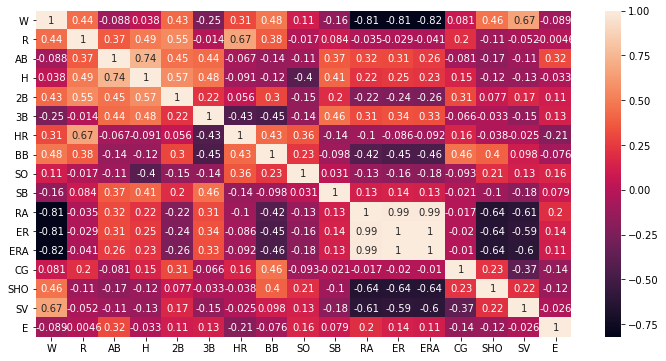

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(game.corr(), annot = True)
plt.show

In [16]:
game.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.438759,-0.087947,0.036473,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.820339,0.044033,0.462688,0.667490,-0.089862
R,0.438759,1.000000,0.372007,0.488973,0.553857,-0.013861,0.666503,0.376182,-0.017241,0.083864,-0.035499,-0.028747,-0.040990,0.226977,-0.105986,-0.047571,-0.004058
AB,-0.087947,0.372007,1.000000,0.739633,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255358,-0.067194,-0.172929,-0.119333,0.319528
H,0.036473,0.488973,0.739633,1.000000,0.566556,0.477656,-0.091089,-0.118073,-0.399528,0.414587,0.223862,0.252199,0.230093,0.105782,-0.120466,-0.142002,-0.032870
2B,0.427797,0.553857,0.453370,0.566556,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.255445,0.309868,0.077082,0.156524,0.107678
3B,-0.251118,-0.013861,0.435422,0.477656,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330002,-0.047157,-0.033289,-0.168134,0.121023
HR,0.307407,0.666503,-0.066983,-0.091089,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.091879,0.180743,-0.038103,-0.013543,-0.203139
BB,0.484342,0.376182,-0.136414,-0.118073,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459487,0.483682,0.399265,0.104127,-0.075777
SO,0.111850,-0.017241,-0.106022,-0.399528,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.181167,-0.101641,0.208001,0.141745,0.159771
SB,-0.157234,0.083864,0.372618,0.414587,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.125757,-0.029412,-0.104776,-0.190252,0.076898


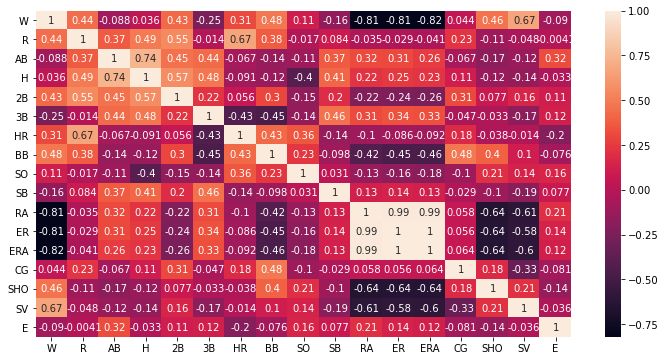

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(game.corr(), annot = True)
plt.show()

In [46]:
game.drop('RA', axis = 1, inplace =True)
game.drop('ER', axis = 1, inplace =True)
game.drop('ERA', axis = 1, inplace =True)

In [47]:
game.shape

(30, 14)

In [48]:
game_new = pd.DataFrame(data=game)
game_new.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724.0,5575,38.691084,300,42,139,383,973,104,1.414214,8.0,7.483315,9.380832
1,83,696.0,5467,36.728735,277,44,156,439,1264,70,1.414214,12.0,6.708204,9.273618
2,81,669.0,5439,37.349699,303,29,141,533,1157,86,3.316625,10.0,6.164414,8.888194
3,76,622.0,5533,37.161808,260,27,136,404,1231,68,2.645751,9.0,6.082763,10.049876
4,74,689.0,5605,38.923001,289,49,151,455,1259,83,2.645751,12.0,5.916080,9.273618


In [49]:
x = game_new.iloc[:,1:14]
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,724.0,5575,38.691084,300,42,139,383,973,104,1.414214,8.0,7.483315,9.380832
1,696.0,5467,36.728735,277,44,156,439,1264,70,1.414214,12.0,6.708204,9.273618
2,669.0,5439,37.349699,303,29,141,533,1157,86,3.316625,10.0,6.164414,8.888194
3,622.0,5533,37.161808,260,27,136,404,1231,68,2.645751,9.0,6.082763,10.049876
4,689.0,5605,38.923001,289,49,151,455,1259,83,2.645751,12.0,5.916080,9.273618


In [50]:
x.shape[1]

13

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [55]:
y = game['W']
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [56]:
dtc = DecisionTreeRegressor()
lr = LinearRegression()
svc = SVR()
rnd = RandomForestRegressor()

In [57]:
for i in range(0,3000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = i)
    svc.fit(x_train,y_train)
    pred_train = svc.predict(x_train)
    pred_test = svc.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("AT random state",i,"the model performing good") 

AT random state 2885 the model performing good


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 2885)
print(dtc.fit(x_train,y_train))
print(lr.fit(x_train,y_train))
print(svc.fit(x_train,y_train))
print(rnd.fit(x_train,y_train))

DecisionTreeRegressor()
LinearRegression()
SVR()
RandomForestRegressor()


In [59]:
pred_dtc = dtc.predict(x_test)
pred_lr = lr.predict(x_test)
pred_svc = svc.predict(x_test)
pred_rnd = rnd.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_dtc))
print('Means Squared Error',mean_squared_error(y_test,pred_dtc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_dtc)))
print('Model Score',r2_score(y_test,pred_dtc))

Error Calculations: -
Means absolute error 6.25
Means Squared Error 57.5
Root mean square 7.582875444051551
Model Score -0.05504587155963292


In [61]:
print('Means absolute error', mean_absolute_error(y_test,pred_lr))
print('Means Squared Error',mean_squared_error(y_test,pred_lr))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Model Score',r2_score(y_test,pred_lr))

Means absolute error 6.061725146651216
Means Squared Error 54.247772181765576
Root mean square 7.36530869561932
Model Score 0.004628033362099493


In [62]:
print('Means absolute error', mean_absolute_error(y_test,pred_svc))
print('Means Squared Error',mean_squared_error(y_test,pred_svc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_svc)))
print('Model Score',r2_score(y_test,pred_svc))

Means absolute error 6.226731169634396
Means Squared Error 50.32512017718372
Root mean square 7.094020029375708
Model Score 0.07660329950121614


In [63]:
print('Means absolute error', mean_absolute_error(y_test,pred_rnd))
print('Means Squared Error',mean_squared_error(y_test,pred_rnd))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_rnd)))
print('Model Score',r2_score(y_test,pred_rnd))

Means absolute error 4.798749999999998
Means Squared Error 26.90501249999999
Root mean square 5.18700419317355
Model Score 0.5063300458715598


In [64]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Means absolute error', mean_absolute_error(y_test,predad))
print('Means Squared Error',mean_squared_error(y_test,predad))
print('Root mean square', np.sqrt(mean_squared_error(y_test,predad)))
print('Model Score',r2_score(y_test,predad))

Means absolute error 4.442045454545456
Means Squared Error 24.440293130165294
Root mean square 4.943712484577283
Model Score 0.5515542544923799


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' :[100,200,300,400,500,600,700,800],
               'criterion'  :['squared_error','mse','absolute_error','poisson'],
               'max_depth' :[300,400,500,600,700,800],
               'min_samples_split' :[100,200,300,400,500]   
             }

grid_cv = GridSearchCV(estimator=rnd, param_grid = parameters)
grid_cv.fit(x_test, y_test)
best_para = grid_cv.best_params_
print(best_para)
best_result = grid_cv.best_score_
print(best_result)
print(round(best_result,2))